# 6.1. Obtención de datos financieros

In [3]:
import pandas as pd
import requests

# 6.1. Obtención de datos financieros

1. Regístrate en iexcloud: https://iexcloud.io/
2. Genera un token para poder realizar las peticiones al API.
3. Explora la documentación del API en: https://iexcloud.io/docs/api/#historical-prices

4. Prueba en el navegador las siguientes direcciones (cambiado donde pone PON_TU_TOKEN por el token del apartado 2):
    - Bolsas disponibles: https://cloud.iexapis.com/stable/ref-data/exchanges?token=PON_TU_TOKEN
    - Activos de una Bolsa de Madrid: https://cloud.iexapis.com/stable/ref-data/exchange/XMAD/symbols?token=PON_TU_TOKEN
    - Precios de MSFT del último año: https://cloud.iexapis.com/stable/stock/msft/chart/1y?token=PON_TU_TOKEN
    - Precios de SANSN del último año: https://cloud.iexapis.com/stable/stock/SAN-SN/chart/1y?token=PON_TU_TOKEN

5. Ahora pide lo mismo desde python usando la libreria requests de la siguiente forma:

```python
import requests
import pandas as pd

url = f'https://cloud.iexapis.com/stable/------rellena lo que quieras pedir ----'
r = requests.get(url, params={'token': TU_TOKEN})
df = pd.DataFrame(r.json())
```

6. Crea una función que retorne el open, high, low, close y volumen diario del último año, dado un ticker. Consulta la sección y ejemplos de historical prices: https://iexcloud.io/docs/api/#historical-prices

7. Modifica la función anterior para que solamente pida el precio de cierre.

10. Pinta las figuras de velas correspondiente al último ejercicio.

___

In [25]:
TOKEN = 'TU_TOKEN'
base_url = 'https://cloud.iexapis.com/stable' 

In [5]:
url = f'{base_url}/ref-data/exchanges'
r = requests.get(url, params={'token':TOKEN})
exchanges = pd.DataFrame(r.json())

In [6]:
exchanges.head()

,exchange,region,description,mic,segment,segmentDescription,suffix,exchangeSuffix
0,A2XX,ZA,A 2 X,A2XX,A2XX,A 2 X,AJ,AJ
1,AIXK,KZ,Astana International Exchange Ltd,AIXK,AIXK,Astana International Exchange Ltd,KX,KX
2,APXL,AU,Sydney Stock Exchange Limited,APXL,APXL,Sydney Stock Exchange Limited,PF,PF
3,ARCX,US,Nyse Arca,ARCX,ARCX,Nyse Arca,,
4,ASEX,GR,Athens Stock Exchange,ASEX,ENAX,Athens Exchange Alternative Market,GA,GA


Obtenemos los activos que cotizan en Bolsa de Madrid

In [7]:
exchange = 'XMAD'
url = f"{base_url}/ref-data/exchange/{exchange}/symbols"
r = requests.get(url, params={'token': TOKEN})
symbols = pd.DataFrame(r.json())

In [9]:
symbols.head()

,symbol,exchange,exchangeSuffix,exchangeName,exchangeSegment,exchangeSegmentName,name,date,type,iexId,region,currency,isEnabled,figi,cik,lei
0,A3M-SN,XMAD,SN,Bolsa De Madrid,XMAD,Bolsa De Madrid,Atresmedia Corporacion De Medios De Comunicaci...,2023-03-31,cs,None,ES,EUR,True,BBG000F5P2P2,0001450460,95980020140005491929
1,A3MSN,XMAD,SN,Bolsa De Madrid,XMAD,Bolsa De Madrid,Atresmedia Corporacion De Medios De Comunicaci...,2022-06-13,cs,None,ES,EUR,True,BBG000F5P2P2,0001450460,95980020140005491929
2,ABG-SN,XMAD,SN,Bolsa De Madrid,XMAD,Bolsa De Madrid,Abengoa - Class A,2022-09-26,cs,None,ES,EUR,True,BBG000BM26X6,0001161785,8ZQH7RR6DBQZIX8PEQ84
3,ABG.P-SN,XMAD,SN,Bolsa De Madrid,XMAD,Bolsa De Madrid,Abengoa - Class B,2022-09-26,cs,None,ES,EUR,True,BBG003BMYW77,0001161785,8ZQH7RR6DBQZIX8PEQ84
4,ABG.PSN,XMAD,SN,Bolsa De Madrid,XMAD,Bolsa De Madrid,Abengoa - Class B,2022-06-13,cs,None,ES,EUR,True,BBG003BMYW77,0001161785,8ZQH7RR6DBQZIX8PEQ84


6. Crea una función que retorne el open, high, low, close y volumen diario del último año, dado un ticker.

Consulta la sección y ejemplos de historical prices

Utiliza el ticker de Nvidia para invocar la función: 'nvda'

In [12]:
def get_data_iex(symbol, st_range='1y'):
    url = f"{base_url}/stock/{symbol}/chart/{st_range}"
    r = requests.get(url, params={'token': TOKEN})
    data = pd.DataFrame(r.json())
    data = data.set_index('date')
    data.index = pd.to_datetime(data.index)
    return data

In [13]:
data_day = get_data_iex('nvda')
data_day.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
date,,,,,,,,,,,,,,,,,,,,,
2022-03-31,272.86,282.48,272.70,277.82,2022-03-31,NVDA,52344022,HISTORICAL_PRICES,NVDA,,...,272.70,52344022,277.561,272.605,282.216,272.445,52344022,"Mar 31, 22",0.00,0.0000
2022-04-01,267.12,274.96,262.67,273.75,2022-04-01,NVDA,51723511,HISTORICAL_PRICES,NVDA,,...,262.67,51723511,273.494,266.871,274.703,262.425,51723511,"Apr 1, 22",-5.74,-0.0210
2022-04-04,273.60,275.58,266.13,267.28,2022-04-04,NVDA,39770782,HISTORICAL_PRICES,NVDA,,...,266.13,39770782,267.030,273.345,275.323,265.882,39770782,"Apr 4, 22",6.48,0.0243
2022-04-05,259.31,273.19,258.20,272.54,2022-04-05,NVDA,43661473,HISTORICAL_PRICES,NVDA,,...,258.20,43661473,272.286,259.068,272.935,257.959,43661473,"Apr 5, 22",-14.29,-0.0522
2022-04-06,244.07,253.00,240.03,249.34,2022-04-06,NVDA,70383256,HISTORICAL_PRICES,NVDA,,...,240.03,70383256,249.107,243.842,252.764,239.806,70383256,"Apr 6, 22",-15.24,-0.0588


In [14]:
data_day_OLHC = data_day.loc[:, 'close':'open']
data_day_OLHC.head()

,close,high,low,open
date,,,,
2022-03-31,272.86,282.48,272.70,277.82
2022-04-01,267.12,274.96,262.67,273.75
2022-04-04,273.60,275.58,266.13,267.28
2022-04-05,259.31,273.19,258.20,272.54
2022-04-06,244.07,253.00,240.03,249.34


7. Modifica la función anterior para que solamente pida el precio de cierre.

In [34]:
def get_data_iex(symbol, st_range='1y', closeonly= True): 
    url = f"{base_url}/stock/{symbol}/chart/{st_range}"
    r = requests.get(
        url,
        params={
            'token': TOKEN,
            'chartCloseOnly': closeonly
        }
    )
    data = pd.DataFrame(r.json())
    data = data.set_index('date')
    data.name = symbol
    if closeonly:
        return data.close   
    return data

In [35]:
df_san = get_data_iex('SAN-SN')

<AxesSubplot: xlabel='date'>

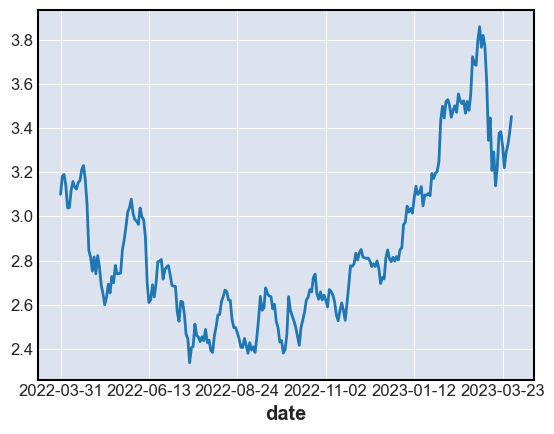

In [36]:
df_san.plot()

8. Pinta las figuras de velas correspondiente al último ejercicio.

In [15]:
import mplfinance as mpf

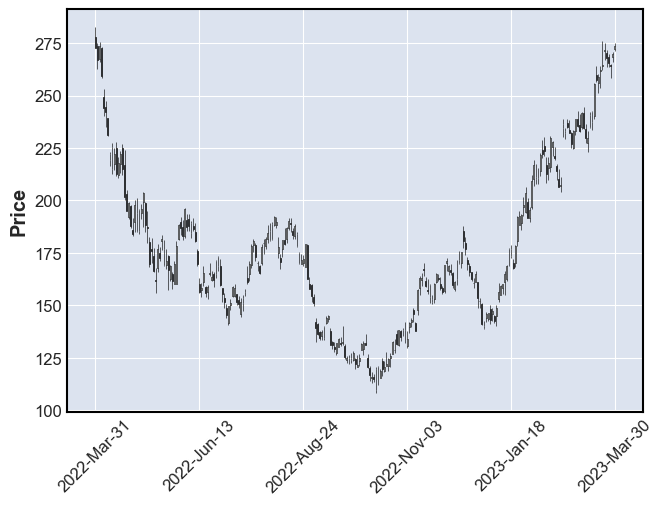

In [16]:
mpf.plot(data_day_OLHC, type='candle')

## Otros

### Investpy

Para descargar datos de Investing

investpy: https://investpy.readthedocs.io/

<center>
<img src="./imgs/investing.png"  alt="drawing" width="1000"/>
</center>

Ojo. Lo que está haciendo esta librería es un webscraping. Por lo que si cambia la web, la fiabilidad de los datos sería muy cuestionable.

### Pandas Data Reader

Pandas tiene una librería para descargar datos de multitud de fuentes

pandas-datareader: https://pandas-datareader.readthedocs.io

<center>
<img src="./imgs/pandas_datareader.png"  alt="drawing" width="1000"/>
</center>

Esta librería nos permite conectarnos con multitud de fuentes de datos: IEX, Alpha Vantage, Quandl...

<center>
<img src="./imgs/fuentes_pandas.png"  alt="drawing" width="1000"/>
</center>

Por ejemplo, para conectarnos a IEX desde Pandas Data Reader

<center>
<img src="./imgs/iex_pandas.png"  alt="drawing" width="1000"/>
</center>